In [1]:
from SantaFe import SantaFeAgent, SantaFeFood, SantaFeWorld
from SantaFe.Grammar import terminals
from grammaticalevolutiontools.evolution import cross_over, mutation
from matplotlib import pyplot as plt

from tqdm import tqdm
import random
import heapq

%matplotlib widget

In [2]:
AGENT_CMAP = {SantaFeAgent: 'red'}
OBJ_CMAP = {SantaFeFood: 'lime'}

In [10]:
world = SantaFeWorld()
best_agent = None
best_score = -1

num_generations = 20
num_agents = 100
num_to_keep = 50
num_to_regen = 10
num_ticks = 300

agents = [SantaFeAgent() for _ in range(num_agents)]
best_agents = []
best_agent = None

for gen in range(num_generations):
    print(f"GENERATION {gen + 1}: ")
    best_agents.clear()
    print('running agents...')
    for agent in tqdm(agents):
        world.reset_with_agent(agent)
        world.tick(num_ticks)

        if len(best_agents) < num_to_keep:
            heapq.heappush(best_agents, (agent.score + 1, agent))
        else:
            heapq.heapreplace(best_agents, (agent.score + 1, agent))

        if agent.score > best_score:
            best_agent = agent
            best_score = best_agent.score
            print(f'new best agent: {best_score}')

    print('creating new generation...')
    weights, agents = zip(*best_agents)
    breeding_pool = list(agents) + [SantaFeAgent() for _ in range(num_to_regen)]
    selection_weights = list(weights) + [1]*num_to_regen
    new_agents = []

    while len(new_agents) < num_agents:
        agent1, agent2 = random.choices(breeding_pool, weights=selection_weights, k=2)
        prog1, prog2 = cross_over.cross_over(agent1.program, agent2.program)
        
        if random.random() < 0.7:
            mutation.mutate_terminals(prog1, num_mutations=2, terminal_types=terminals)
        if random.random() < 0.7:
            mutation.mutate_terminals(prog2, num_mutations=2, terminal_types=terminals)

        new_agents.append(SantaFeAgent(prog1))
        new_agents.append(SantaFeAgent(prog2))

    agents = new_agents


print(best_agent.score)
print(best_agent.program)

GENERATION 1: 
running agents...


  2%|▏         | 2/100 [00:00<00:05, 18.59it/s]

new best agent: 0
new best agent: 3.0


  6%|▌         | 6/100 [00:00<00:07, 13.08it/s]

new best agent: 11.0


 14%|█▍        | 14/100 [00:00<00:06, 14.30it/s]

new best agent: 12.0


 24%|██▍       | 24/100 [00:01<00:05, 13.83it/s]

new best agent: 13.0


100%|██████████| 100/100 [00:06<00:00, 14.88it/s]


creating new generation...
GENERATION 2: 
running agents...


100%|██████████| 100/100 [00:08<00:00, 11.62it/s]


creating new generation...
GENERATION 3: 
running agents...


100%|██████████| 100/100 [00:12<00:00,  8.03it/s]


creating new generation...
GENERATION 4: 
running agents...


 26%|██▌       | 26/100 [00:03<00:08,  8.64it/s]

new best agent: 14.0


100%|██████████| 100/100 [00:11<00:00,  8.55it/s]


creating new generation...
GENERATION 5: 
running agents...


 51%|█████     | 51/100 [00:07<00:12,  3.97it/s]

new best agent: 17.0


100%|██████████| 100/100 [00:14<00:00,  6.67it/s]


creating new generation...
GENERATION 6: 
running agents...


100%|██████████| 100/100 [00:13<00:00,  7.25it/s]


creating new generation...
GENERATION 7: 
running agents...


100%|██████████| 100/100 [00:13<00:00,  7.20it/s]


creating new generation...
GENERATION 8: 
running agents...


100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


creating new generation...
GENERATION 9: 
running agents...


100%|██████████| 100/100 [00:16<00:00,  5.92it/s]


creating new generation...
GENERATION 10: 
running agents...


100%|██████████| 100/100 [00:15<00:00,  6.43it/s]


creating new generation...
GENERATION 11: 
running agents...


 99%|█████████▉| 99/100 [00:15<00:00,  6.64it/s]

new best agent: 18.0


100%|██████████| 100/100 [00:15<00:00,  6.38it/s]


creating new generation...
GENERATION 12: 
running agents...


100%|██████████| 100/100 [00:15<00:00,  6.65it/s]


creating new generation...
GENERATION 13: 
running agents...


100%|██████████| 100/100 [00:14<00:00,  7.10it/s]


creating new generation...
GENERATION 14: 
running agents...


100%|██████████| 100/100 [00:15<00:00,  6.53it/s]


creating new generation...
GENERATION 15: 
running agents...


 78%|███████▊  | 78/100 [00:12<00:03,  7.02it/s]

new best agent: 22.0


100%|██████████| 100/100 [00:15<00:00,  6.55it/s]


creating new generation...
GENERATION 16: 
running agents...


100%|██████████| 100/100 [00:13<00:00,  7.44it/s]


creating new generation...
GENERATION 17: 
running agents...


100%|██████████| 100/100 [00:12<00:00,  7.82it/s]


creating new generation...
GENERATION 18: 
running agents...


 99%|█████████▉| 99/100 [00:12<00:00,  8.45it/s]

new best agent: 23.0


100%|██████████| 100/100 [00:12<00:00,  8.10it/s]


creating new generation...
GENERATION 19: 
running agents...


100%|██████████| 100/100 [00:12<00:00,  7.97it/s]

new best agent: 28.0
creating new generation...


GENERATION 20: 
running agents...


100%|██████████| 100/100 [00:15<00:00,  6.61it/s]


creating new generation...
0
if_wall_ahead(Progs3(Left, Progs3(if_wall_ahead(Move, Progs3(if_food_ahead(Progs2(if_food_ahead(Progs2(if_wall_ahead(if_wall_ahead(Right, Left, dist=3), Move, dist=1), if_wall_ahead(if_food_ahead(if_wall_ahead(if_wall_ahead(Progs3(Left, Left, Left), Move, dist=2), Move, dist=3), Left, dist=1), if_food_ahead(if_food_ahead(Progs3(Left, Right, Move), Move, dist=1), Move, dist=2), dist=1)), Move, dist=1), Progs3(if_wall_ahead(Left, if_food_ahead(if_wall_ahead(if_wall_ahead(Move, Move, dist=3), Move, dist=1), Progs2(Left, Right), dist=1), dist=2), Progs2(Move, if_wall_ahead(Progs3(Move, Left, Move), Right, dist=2)), Left)), Progs3(if_food_ahead(Progs2(Left, Progs3(if_wall_ahead(Left, if_food_ahead(if_wall_ahead(Move, Left, dist=3), Progs2(Move, Move), dist=1), dist=3), Right, Move)), Progs3(Left, Move, Move), dist=3), Move, Right), dist=1), Move, Left), dist=2), Move, if_food_ahead(Move, if_wall_ahead(Left, Move, dist=3), dist=2)), Right), Move, dist=3)


In [11]:
world.reset_with_agent(best_agent, recording_on=True)
world.tick(num_ticks)
anim = world.generate_animation(
    bg_color='black', 
    agent_colors=AGENT_CMAP, 
    obj_colors=OBJ_CMAP,
    arrow_color='blue'
    )

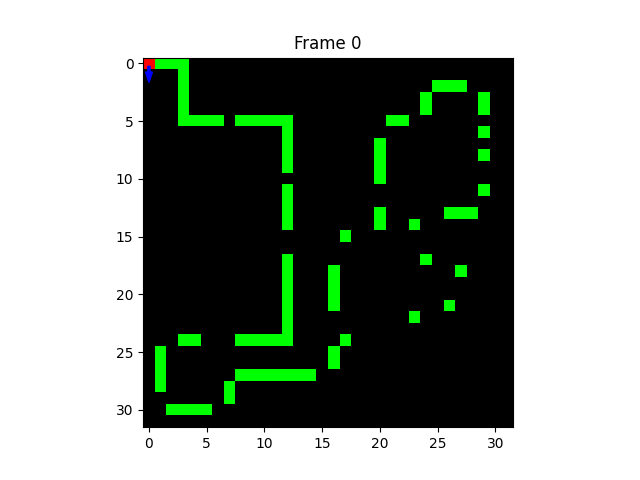

In [12]:
a = anim.play(pause=50)